In [1]:
%matplotlib inline

In [2]:
#attaching packages 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import seaborn as sns
import statsmodels
from statsmodels import api as sm
import statsmodels.stats.api as sms
import math
import statsmodels.api as smv

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Ela\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


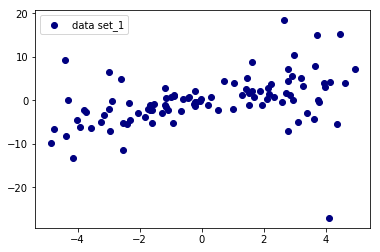

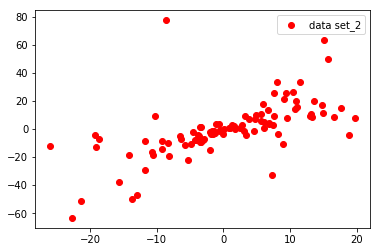

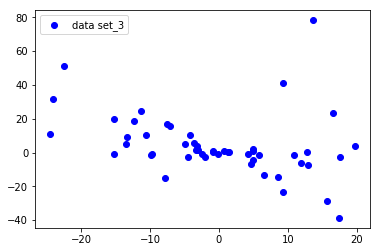

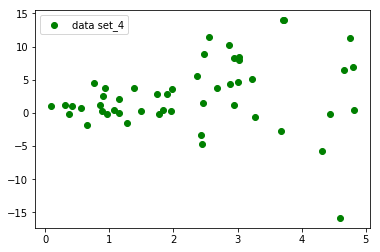

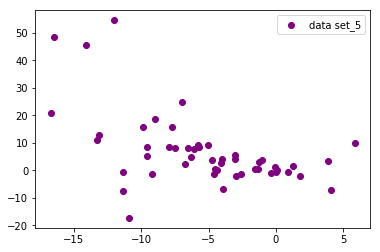

In [3]:
#loading 5 data sets from home-directory
data = {}
resp = {}
for i in range(1,6):
    fname='X_'+str(i)+'.txt'
    fnamey='Y_'+str(i)+'.txt'
    X=np.loadtxt(fname)
    Y=np.loadtxt(fnamey)
    data[i-1] = X
    resp[i-1] = Y

MINN=np.zeros(5)
MAXX=np.zeros(5)
C=['navy', 'red', 'blue', 'green', 'purple','yellow']
for i in range(0,5):
    MINN[i], MAXX[i] = data[i].min() - 1, data[i].max() + 1
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.legend(['data set_'+str(i+1)])
    


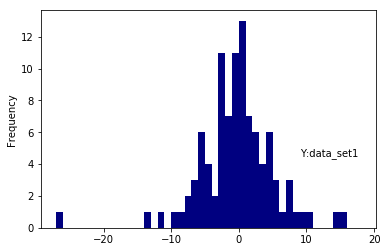

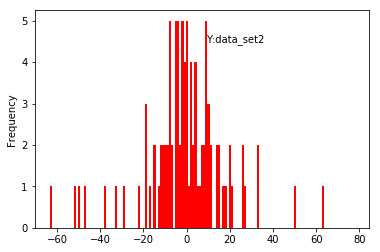

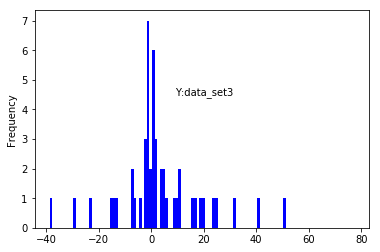

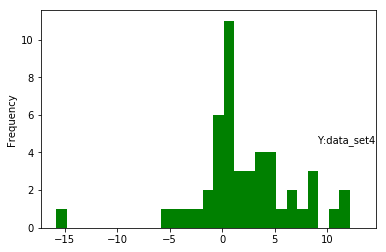

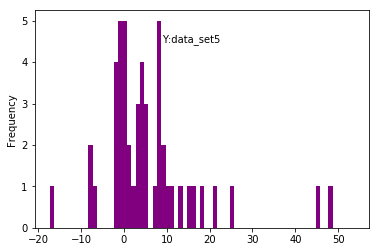

In [4]:
#distribution of Y
MINNR=np.zeros(5)
MAXXR=np.zeros(5)
for i in range(0,5):
    MINNR[i], MAXXR[i] =resp[i].min(), resp[i].max()
    BINNR= list(np.arange(MINNR[i],MAXXR[i],1))
    fig, ax = plt.subplots()
    pd.Series(resp[i]).plot(kind='hist', bins=BINNR,color=C[i],label="KK")
    plt.text(9, 4.5, 'Y:data_set'+str(i+1))
    
    

In [5]:
#OLS model
dataP={} 
ols_result={}
for i in range(0,5):
    dataP[i]=sm.add_constant(data[i])
    #print(dataP[i])
    ols_result[i] = sm.OLS(resp[i],dataP[i] ).fit()
    print(ols_result[i].summary())
    #print('Parameters: ', ols_result[i].params)
    #print('R2: ', ols_result[i].rsquared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           2.93e-05
Time:                        20:16:19   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2695      0.536     -0.503      0.6

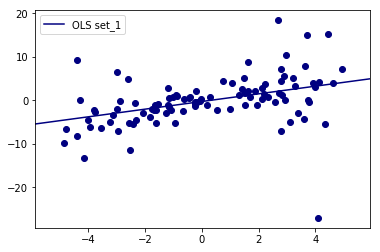

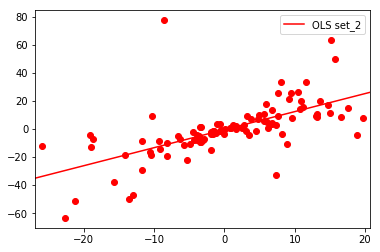

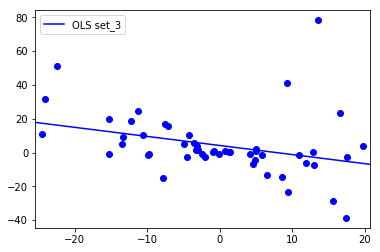

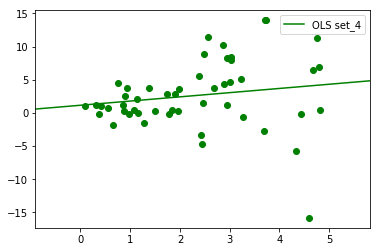

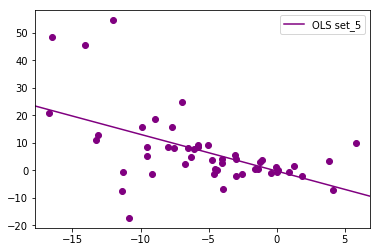

In [6]:
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], ols_result[i].predict(Datas[i]), color=C[i],label='OLS model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['OLS set_'+str(i+1)])

In [7]:
#test for normality
print("Test For Checking Normality BY Jarque-Bera")
for i in range(0,5):
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(ols_result[i].resid)
    print('data_'+str(i+1), test)

   

Test For Checking Normality BY Jarque-Bera
data_1 (472.39980463722924, 2.6283657356926387e-103, -1.324067850511277, 13.313259931850103)
data_2 (522.3149203148531, 3.808519168472229e-114, 1.778461703504943, 13.61620820972488)
data_3 (173.5060597283974, 2.1068704967045583e-38, 2.224833573047068, 10.96764525807978)
data_4 (29.40467998416821, 4.119598301096693e-07, -0.8479323772682648, 6.352355757780116)
data_5 (29.921077427200533, 3.1821495811975905e-07, 0.8301034559594401, 6.40673306478113)


In [8]:
print('Heteroscedasticity Test')
ols_resid={}
resid_fit={}
rho={}
for i in range(0,5):
    ols_resid[i] = ols_result[i].resid
    resid_fit[i] = sm.OLS(ols_resid[i][1:], sm.add_constant(ols_resid[i][:-1])).fit()
    rho[i] = resid_fit[i].params[1]

    #test for Heteroscedasticity Test
for i in range(0,5):
    print('data_set_'+str(i+1),statsmodels.stats.diagnostic.het_white(ols_resid[i]**2, dataP[i], retres=False))

Heteroscedasticity Test
data_set_1 (4.808483341748426, 0.09033397252489685, 2.449918335811942, 0.0916252027127786)
data_set_2 (0.8001970719581641, 0.6702539986476804, 0.39122616017818734, 0.677289362845173)
data_set_3 (2.601350287860371, 0.2723478569468163, 1.289735723190059, 0.28490835576732)
data_set_4 (6.019181004685592, 0.04931186772081809, 3.216191895498382, 0.04907866478928356)
data_set_5 (7.6502982613980475, 0.021815181975108996, 4.245177693399951, 0.020192415053641378)


In [12]:
print('Outliers Identification')
###using Huber's T norm with the default

huber_t={}
hub_results={}
for i in range(0,5):
    huber_t [i]= smv.RLM(resp[i], dataP[i], M=smv.robust.norms.HuberT())
    hub_results[i] = huber_t[i].fit()
    print('min weight for data_set_'+str(i+1),hub_results[i].weights.min())

Outliers Identification
min weight for data_set_1 0.12089950165960449
min weight for data_set_2 0.10322183897415442
min weight for data_set_3 0.13476214428731814
min weight for data_set_4 0.19749328013764936
min weight for data_set_5 0.14218929521869575


In [13]:
#GLS modeling
from scipy.linalg import toeplitz
order={}
sigma={}
gls_model={}
gls_results={}

toeplitz(range(5))
for i in range(0,5):
    order[i] = toeplitz(range(len(ols_resid[i])))
    sigma[i] = rho[i]**order[i]
    gls_model[i] = sm.GLS(resp[i],dataP[i], sigma=sigma[i])
    gls_results[i] = gls_model[i].fit()
    print(gls_results[i].summary())
    

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            GLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     22.19
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           8.13e-06
Time:                        20:20:42   Log-Likelihood:                -307.14
No. Observations:                 100   AIC:                             618.3
Df Residuals:                      98   BIC:                             623.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2836      0.454     -0.625      0.5

In [14]:
#Checking ols,gls performance on data without outliers
def mse(actual, predicted):
    return ((actual - predicted)**2).mean()

def RSQ(actual, predicted):
    y_bar=actual.mean()
    re=actual-predicted
    NUMM=sum(np.square(re))
    DOMM=sum(np.square(actual-y_bar))
    RESQ=1-(NUMM/DOMM)
    return(RESQ)

dataP_nout={} 
ols_result_nout={}
data_nout={}
data_nout=data
resp_nout={}
resp_nout=resp

data_nout[0] = data[0][data[0] != 4.0820779]
resp_nout[0] = resp[0][resp[0] != -27.00803487]

data_nout[1] = data[1][data[1] != -8.640359541]
resp_nout[1] = resp[1][resp[1] != 77.64225929]

data_nout[2] = data[2][data[2] != 13.60924464]
resp_nout[2] = resp[2][resp[2] != 78.28113593]


            
for i in range(0,5):
    dataP_nout[i]=sm.add_constant(data_nout[i])
    ols_result_nout[i] = sm.OLS(resp_nout[i],dataP_nout[i] ).fit()
    print(ols_result_nout[i].summary())


Y_ols_nout={}
for i in range (0,5):
    Y_ols_nout[i]=data[i]
    Y_ols_nout[i]=Y_ols_nout[i]*ols_result_nout[i].params[1]+ols_result_nout[i].params[0]
    print(ols_result_nout[i])
    print(RSQ(resp[i],Y_ols_nout[i]))


ols_resid_nout={}
resid_fit_nout={}
rho_nout={}
for i in range(0,5):
    ols_resid_nout[i] = ols_result_nout[i].resid
    resid_fit_nout[i] = sm.OLS(ols_resid_nout[i][1:], sm.add_constant(ols_resid_nout[i][:-1])).fit()
    rho_nout[i] = resid_fit_nout[i].params[1]

from scipy.linalg import toeplitz
order_nout={}
sigma_nout={}
gls_model_nout={}
gls_results_nout={}

toeplitz(range(5))
for i in range(0,5):
    order_nout[i] = toeplitz(range(len(ols_resid_nout[i])))
    sigma_nout[i] = rho_nout[i]**order_nout[i]
    gls_model_nout[i] = sm.GLS(resp_nout[i],dataP_nout[i], sigma=sigma_nout[i])
    gls_results_nout[i] = gls_model_nout[i].fit()
    print(gls_results_nout[i].summary())
    #print(gls_results[i].params)
    
Y_gls_nout={}
for i in range (0,5):
    Y_gls_nout[i]=data[i]
    Y_gls_nout[i]=Y_gls_nout[i]*gls_results_nout[i].params[1]+gls_results_nout[i].params[0]
    print(gls_results_nout[i])
    print(RSQ(resp[i],Y_gls_nout[i]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     40.26
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           7.10e-09
Time:                        20:21:58   Log-Likelihood:                -285.50
No. Observations:                  99   AIC:                             575.0
Df Residuals:                      97   BIC:                             580.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.440      0.029      0.9

In [15]:
#MLE with a noise dependent to x
from scipy.optimize import minimize
import math
def myfunc(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a, b, s0, s1 = params # <-- for readability you may wish to assign names to the component variables
    X=np.loadtxt('X_5.txt')
    Y=np.loadtxt('Y_5.txt')
    ss=np.ones((50))
    ress=np.zeros((50))
    kapak=np.zeros((50))
    #print (ress)
    for i in range(0,50):
        ss[i]=((X[i]*s1)**2)+(s0**2)
        ress[i]=((Y[i]-b*X[i]-a)**2)/(2*ss[i])
        #print(ss)
        kapak[i]=math.log(ss[i])
       
    NLL= 0.5*np.sum(kapak)+ np.sum(ress)
    return NLL


myresult= minimize(myfunc, [1 ,1 ,1 ,1],method='BFGS')
print(myresult)

      fun: 114.81521007647805
 hess_inv: array([[ 0.12640253,  0.01813645,  0.01810048, -0.00426204],
       [ 0.01813645,  0.04218741, -0.00018548, -0.00023481],
       [ 0.01810048, -0.00018548,  0.10419203, -0.00919975],
       [-0.00426204, -0.00023481, -0.00919975,  0.02230889]])
      jac: array([9.53674316e-07, 5.72204590e-06, 1.90734863e-06, 4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 12
     njev: 19
   status: 0
  success: True
        x: array([ 0.23780701, -0.85762322,  0.81847457,  1.34786082])


MLE coef for data_set_1 [0.05307253, 0.97987193]
MLE Rsq data_set_1 0.29185398557586284
MLE coef for data_set_2 [-0.43664784, 1.24209258]
MLE Rsq data_set_2 0.5243006087349533
MLE coef for data_set_3 [-0.03350694, -0.40562675]
MLE Rsq data_set_3 0.19137528869671872
MLE coef for data_set_4 [0.848970404, 0.665350423]
MLE Rsq data_set_4 0.025596373566421526
MLE coef for data_set_5 [0.23780701, -0.85762322]
MLE Rsq data_set_5 0.21984216965618752


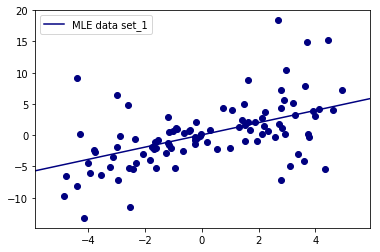

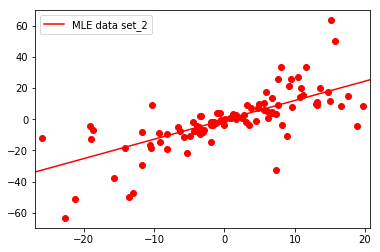

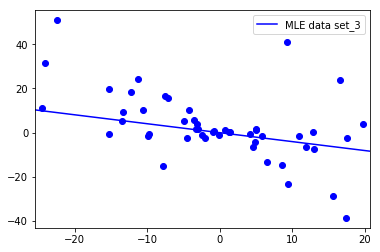

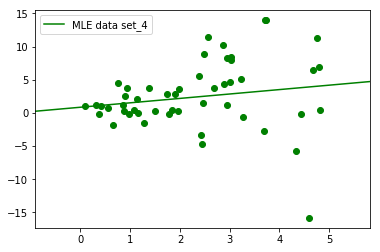

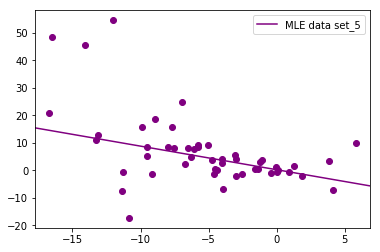

In [19]:

MLE_coef=([0.05307253, 0.97987193], [-0.43664784,  1.24209258], [-0.03350694, -0.40562675], [8.48970404e-01, 6.65350423e-01],[0.23780701, -0.85762322])
#print(MLE_coef[0][0])
Y_MLX={}
for i in range (0,5):
    Y_MLX[i]=data[i]
    Y_MLX[i]=Y_MLX[i]*MLE_coef[i][1]+MLE_coef[i][0]
    print('MLE coef for data_set_'+str(i+1),MLE_coef[i])
    print('MLE Rsq data_set_'+str(i+1),(RSQ(resp[i],Y_MLX[i])))
    
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i], color=C[i]);
    ax.plot(datas[i], datas[i]*MLE_coef[i][1]+MLE_coef[i][0], color=C[i], label='MLE model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['MLE data set_'+str(i+1)])



Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [04:23<00:00, 18.98draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [05:15<00:00, 22.21draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [02:41<00:00, 43.36draws/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [03:58<00:00, 29.30draws/s]
The acceptance probability does not match the target. It is 0.8906291527658613, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains: 100%|█████████████████████████████

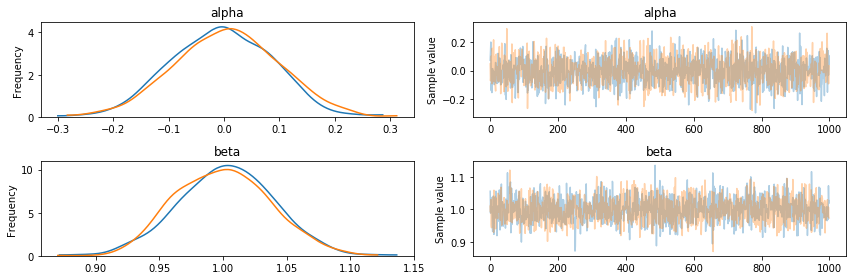

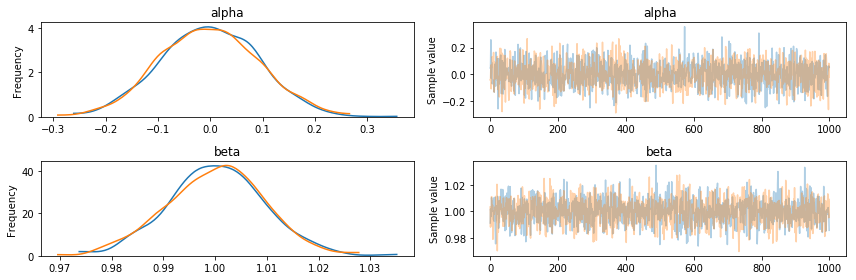

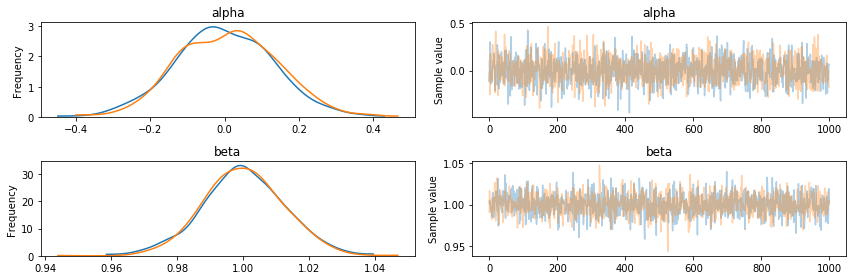

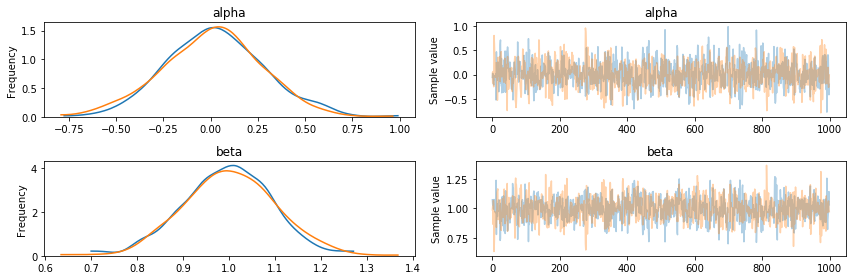

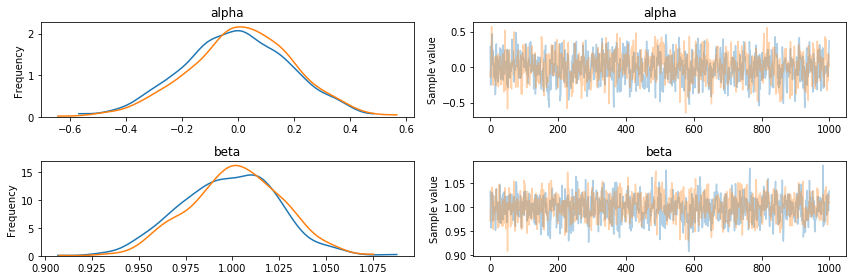

In [17]:
#Baysian Modelling
basic_model={}
y_hat={}
y_obser={}
step={}
trace={}
trace_={}
for i in range(0,5):
    basic_model[i]= pm.Model()
    # Regression coefficients
    with basic_model[i]:
        alpha = pm.Uniform('alpha', -100, 100)
        beta = pm.Uniform('beta', -100, 100)
    
    # Expected value
        y_hat[i] =  data[i]* beta+ alpha 
    # Observations with t-distributed error
        y_obser[i] = pm.StudentT('y_obs[i]', nu=5, mu=y_hat[i], observed=data[i])
        step[i] = pm.NUTS()
        trace_[i] = pm.sample(3000, step[i])
        burn = 1000
        thin = 2
        trace[i] = trace_[i][burn::thin]
        pm.plots.traceplot(trace[i]);

Student-T coef for data_set_1 1.0008706022442138 -0.0005895080337954823
Rsq for data_set_1 0.29257019114043736
Student-T coef for data_set_2 1.000082644975639 -0.002710147107545801
Rsq for data_set_2 0.4882526329546035
Student-T coef for data_set_3 1.000022650754439 0.0024073996467028065
Rsq for data_set_3 -1.3188258803371764
Student-T coef for data_set_4 0.9970683439054323 0.01498564398632196
Rsq for data_set_4 0.015098503877479241
Student-T coef for data_set_5 0.9994572175384412 -0.0018699430398291738
Rsq for data_set_5 -1.4576404973251789


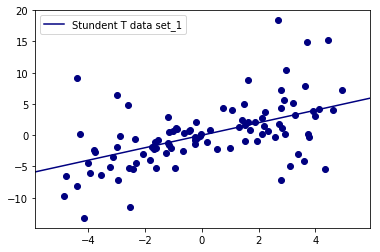

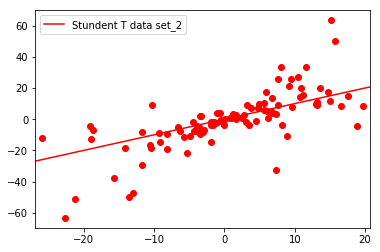

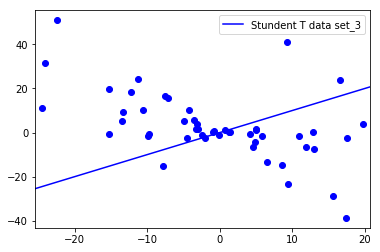

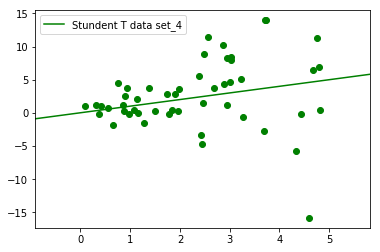

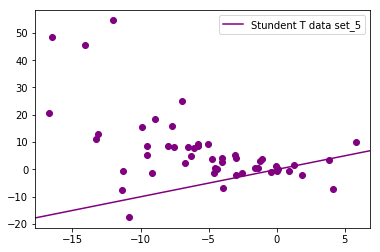

In [23]:
alpha={}
beta={}
for i in range (0,5):
    alpha[i] = trace[i]['alpha'].mean()
    beta[i] = trace[i]['beta'].mean()
    
Y_Rob={}
for i in range (0,5):
    Y_Rob[i]=data[i]
    Y_Rob[i]=Y_Rob[i]*beta[i]+alpha[i]
    print('Student-T coef for data_set_'+str(i+1),beta[i],alpha[i])
    print('Rsq for data_set_'+str(i+1),(RSQ(resp[i],Y_Rob[i])))
    
datas={}
Datas={}
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], datas[i]*beta[i]+alpha[i], color=C[i], label='Robust T-dist model');
    ax.set_xlim(MINN[i], MAXX[i]);
    ax.legend(loc='upper right');
    ax.legend(['Stundent T data set_'+str(i+1)])



In [25]:
#generating Half-Cauchy
modell=pm.Model()
with modell: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.distributions.continuous.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.distributions.continuous.Normal('Intercept', 0, sd=20)
    x_coeff = pm.distributions.continuous.Normal('data[4]', 0, sd=20)

    # Define likelihood
    likelihood = pm.distributions.continuous.Normal('resp[4]', mu=intercept + x_coeff * data[4],
                        sd=sigma, observed=resp[4])

    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [data[4], Intercept, sigma]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 7000/7000 [03:22<00:00, 34.50draws/s]
The acceptance probability does not match the target. It is 0.8869367135055707, but should be close to 0.8. Try to increase the number of tuning steps.


<Figure size 504x504 with 0 Axes>

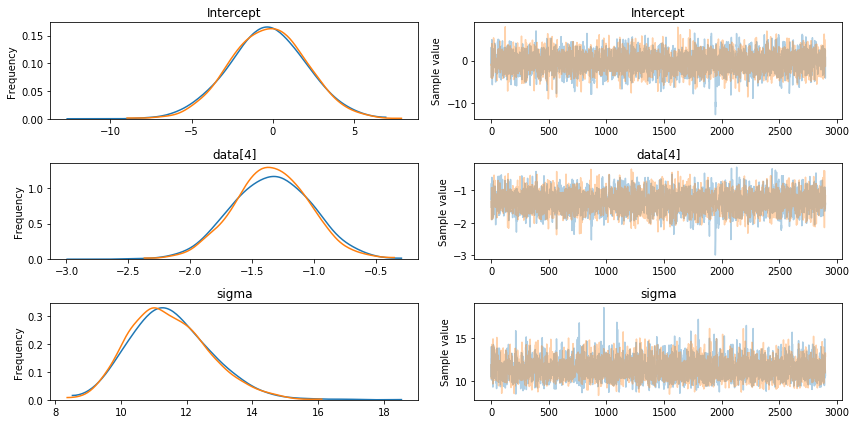

In [26]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();
# with modell:
#     # specify glm and pass in data. The resulting linear model, its likelihood and
#     # and all its parameters are automatically added to our model.
#     glm.GLM.from_formula('y ~ x', data[4])
#     trace = pm.sample(3000, cores=2)

coef for data_set_4 -0.32369707443170476 -1.3409060717512427
Rsqr 0.28055659261033905


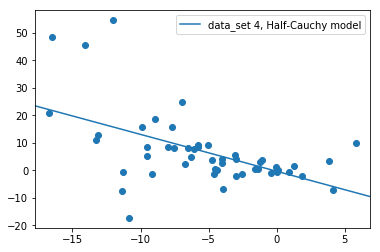

In [27]:
alpha = trace['Intercept'].mean()
beta = trace['data[4]'].mean()
Y_Rob=data[4]
Y_Rob=Y_Rob*beta+alpha
print('coef for data_set_4',alpha,beta)
print('Rsqr', RSQ(resp[4],Y_Rob))
datas= np.linspace(MINN[4], MAXX[4], 20)
Datas= sm.add_constant(datas)
fig, ax = plt.subplots()
ax.scatter(data[4], resp[4]);
ax.plot(datas, datas*beta+alpha, label='data_set 4, Half-Cauchy model');
ax.set_xlim(MINN[4], MAXX[4]);
ax.legend(loc='upper right');

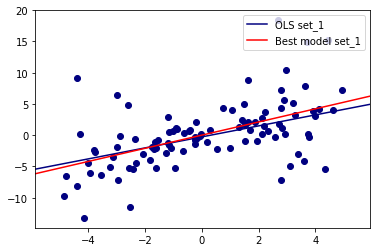

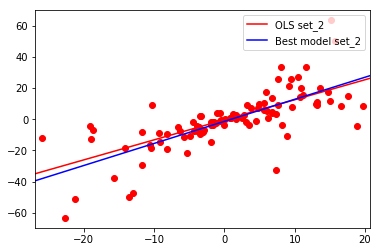

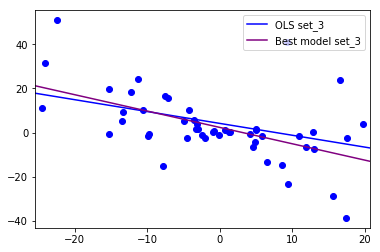

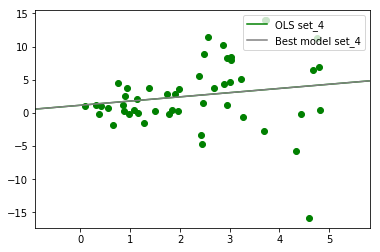

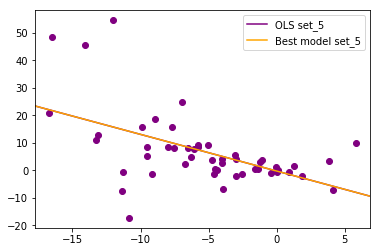

In [28]:
datas={}
Datas={}
alphaa=[0.0119,-1.3971,2.3556,1.1481,-0.2413]
DD=['red', 'blue', 'purple','gray','orange']
betaa=[1.0538,1.4158,-0.7422,0.6334,-1.3331]
for i in range(0,5):
    datas[i]= np.linspace(MINN[i], MAXX[i], 20)
    Datas[i]= sm.add_constant(datas[i])
    fig, ax = plt.subplots()
    ax.scatter(data[i], resp[i],color=C[i]);
    ax.plot(datas[i], ols_result[i].predict(Datas[i]), color=C[i],label='OLS set_'+str(i+1));
    ax.set_xlim(MINN[i], MAXX[i]);
    
    
    ax.plot(datas[i], alphaa[i] + betaa[i] * datas[i],color=DD[i], label='Best model set_'+str(i+1));

    ax.legend(loc='upper right');
